# YOLOv9: Learning What You Want to Learn Using Programmable Gradient Information

- 실시간 객체 탐지 가능한 알고리즘
- 2024년 2월 아카이빙되어 2024 ECCV에 게재(아키이빙 버전은 무료로 확인 가능)
- https://arxiv.org/abs/2402.13616

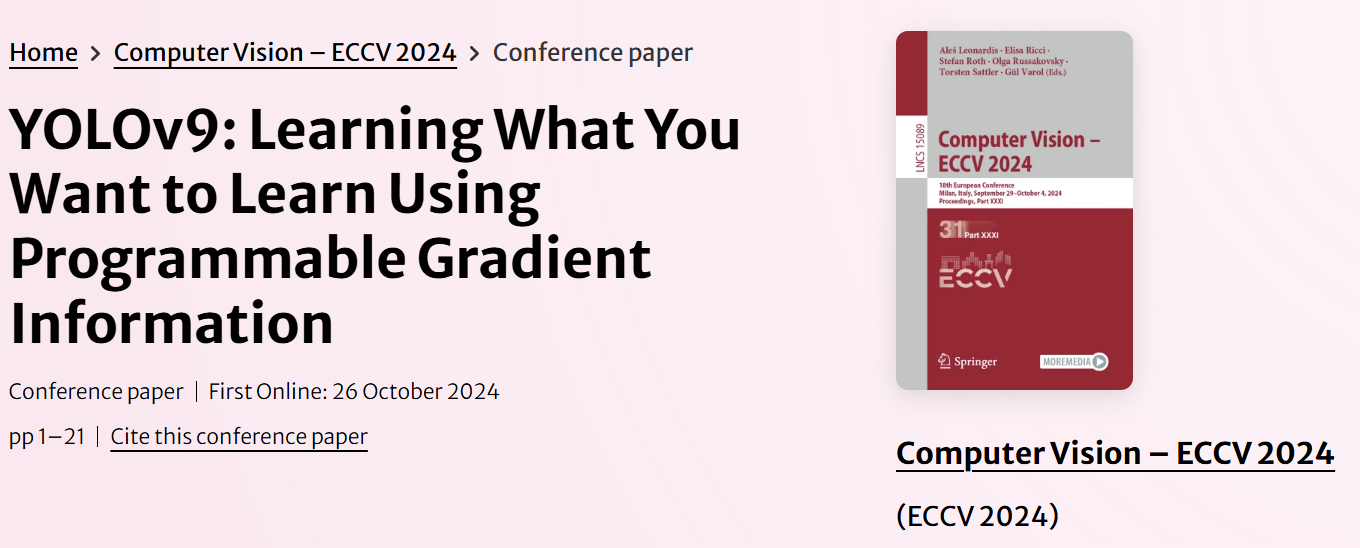

https://github.com/WongKinYiu/yolov9

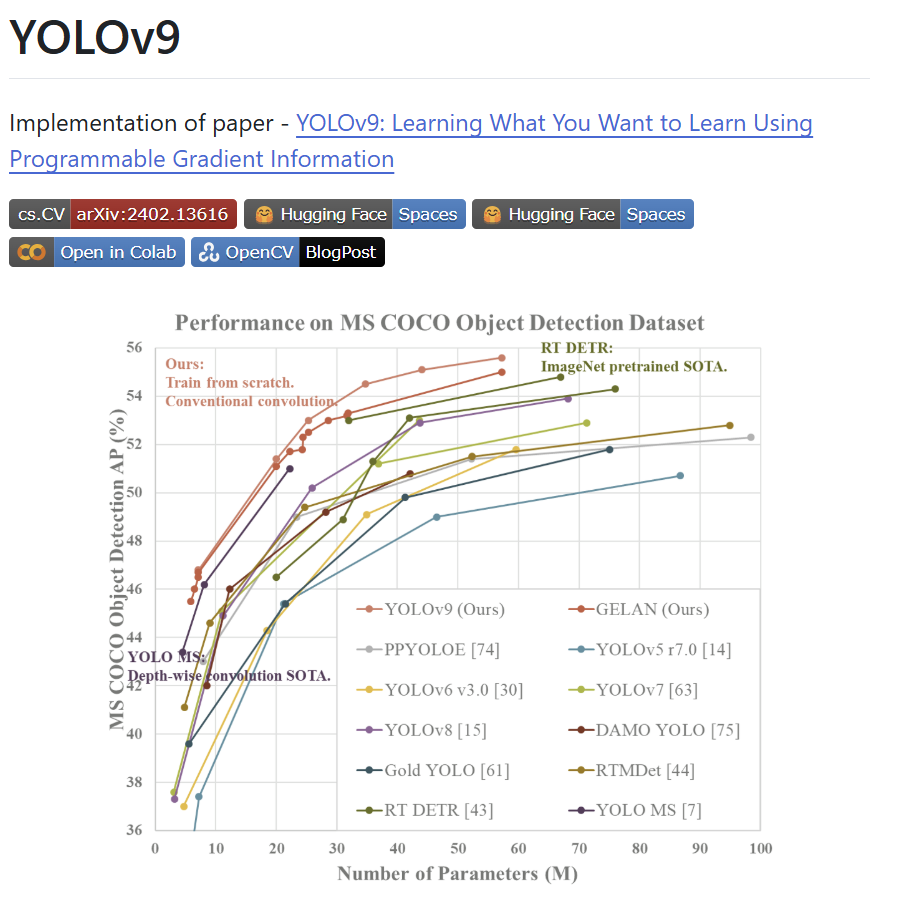

- 데이터 클래스: 80개 (person, bicycle, car, motorcycle, airplane 등)
- 사전학습된 모델로 추가 학습없이 객체 탐지가 가능하며, 추가 탐지하고 싶은 객체 종류는 새롭게 학습을 해야 함 (데이터 라벨링 과정 필요)

### 환경 구축(런타임 GPU 사용으로 변경)
- yolov9 깃 가져오기 및 환경 설치


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

In [1]:
import os
HOME = '/home/xogns5037/Basic_PyTorch/yolov9'
os.chdir(HOME)
print(os.getcwd())

/home/xogns5037/Basic_PyTorch/yolov9


In [ ]:
!pip install -q roboflow

## Example 데이터 다운로드 및 사전학습된 COCO model 로 객체탐지 테스트

### 모델 가중치 다운로드

In [2]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [3]:
!ls -la {HOME}/weights

합계 402436
drwxrwxr-x.  2 xogns5037 xogns5037        80  1월 18 15:12 .
drwxrwxr-x. 17 xogns5037 xogns5037      4096  1월 18 15:07 ..
-rw-rw-r--.  1 xogns5037 xogns5037  51508261  2월 18  2024 gelan-c.pt
-rw-rw-r--.  1 xogns5037 xogns5037 117203713  2월 18  2024 gelan-e.pt
-rw-rw-r--.  1 xogns5037 xogns5037 103153312  2월 18  2024 yolov9-c.pt
-rw-rw-r--.  1 xogns5037 xogns5037 140217688  2월 18  2024 yolov9-e.pt


In [12]:
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [13]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg

detect: weights=['/home/xogns5037/Basic_PyTorch/yolov9/weights/gelan-c.pt'], source=/home/xogns5037/Basic_PyTorch/yolov9/data/dog.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: YOLO requirements "gitpython" "albumentations>=1.0.3" "pycocotools>=2.0" not found, attempting AutoUpdate...
  error: subprocess-exited-with-error
  
  × Building wheel for simsimd (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [5445 lines of output]
      running bdist_wheel
      running build
      running build_py
      running egg_info
      writing simsimd.egg-info/PKG-INFO
      writing dependency_links to simsimd.egg-info/dep

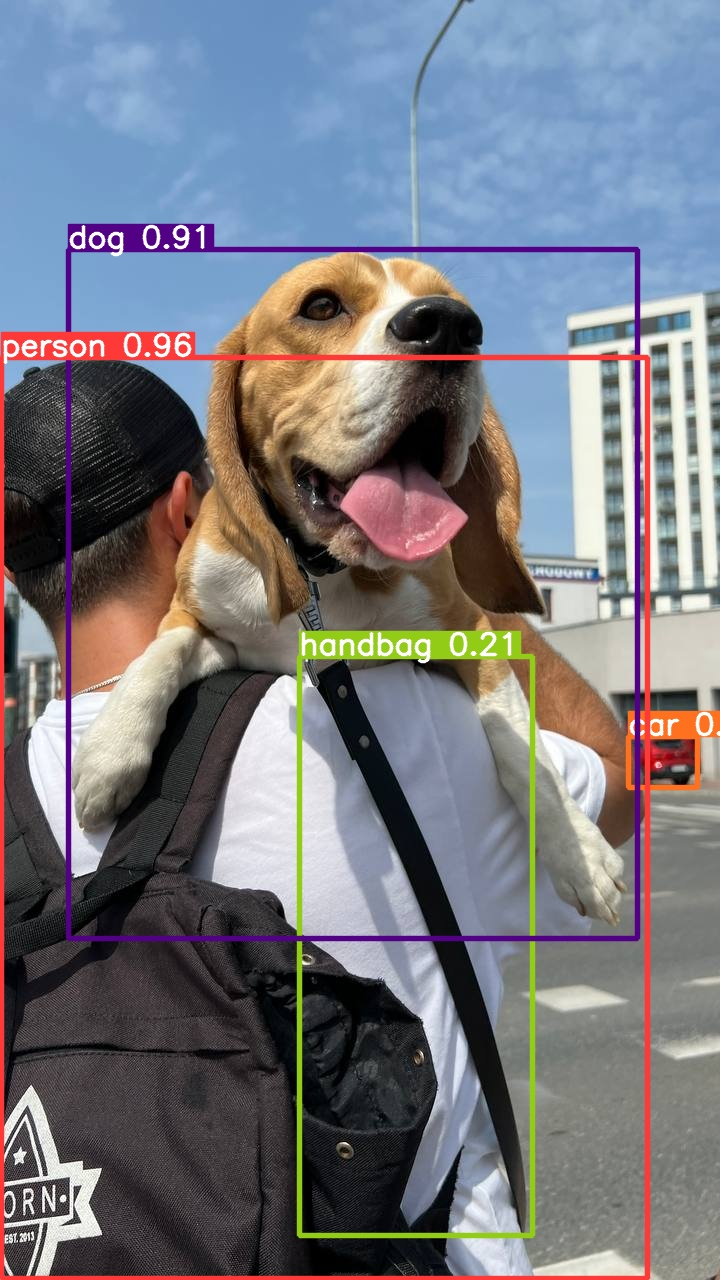

In [14]:
from IPython.display import Image

Image(filename=f"{HOME}/runs/detect/exp/dog.jpeg", width=600)

## 커스텀 데이터셋을 활용한 모델 학습 및 추론

- 본 과정에서는 [football-players-detection](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc) 객체를 탐지하고자 함

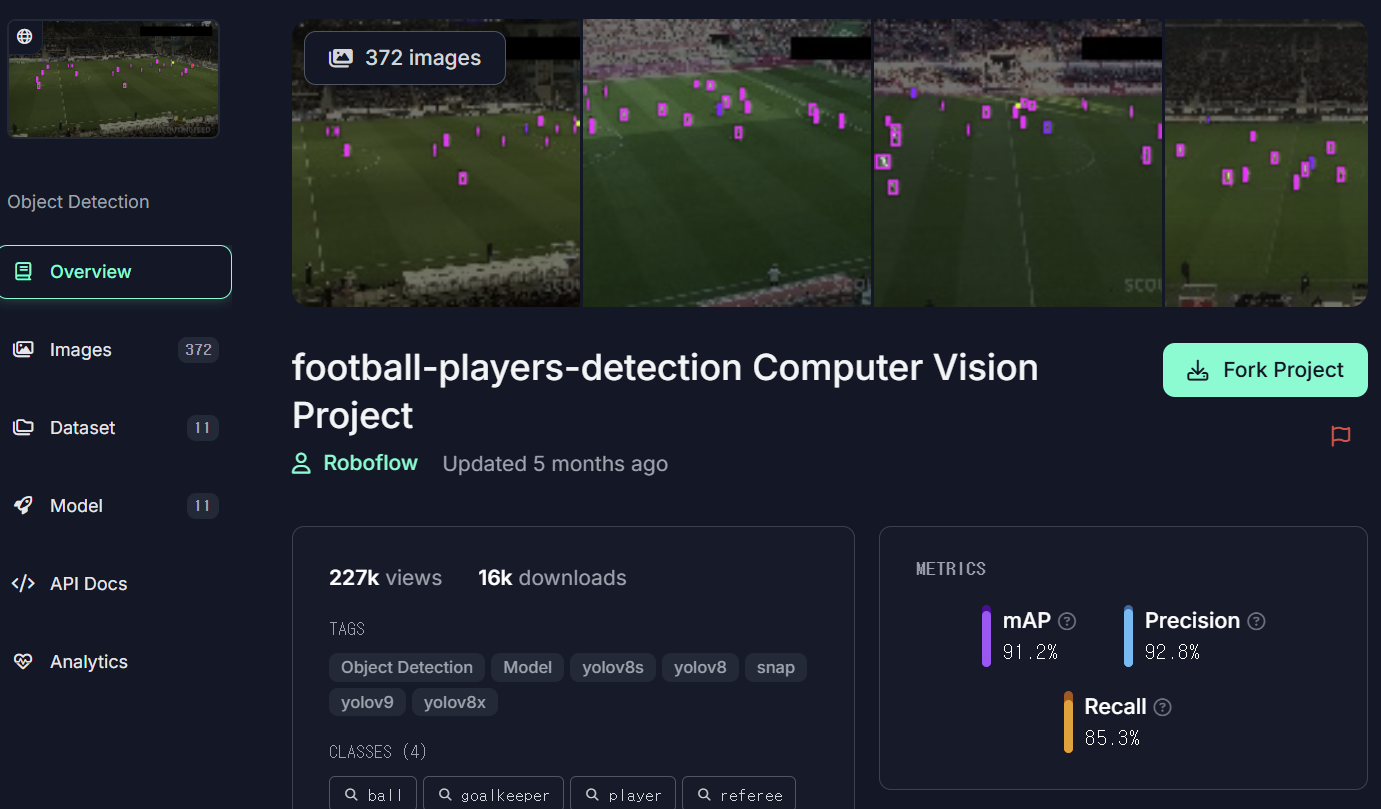

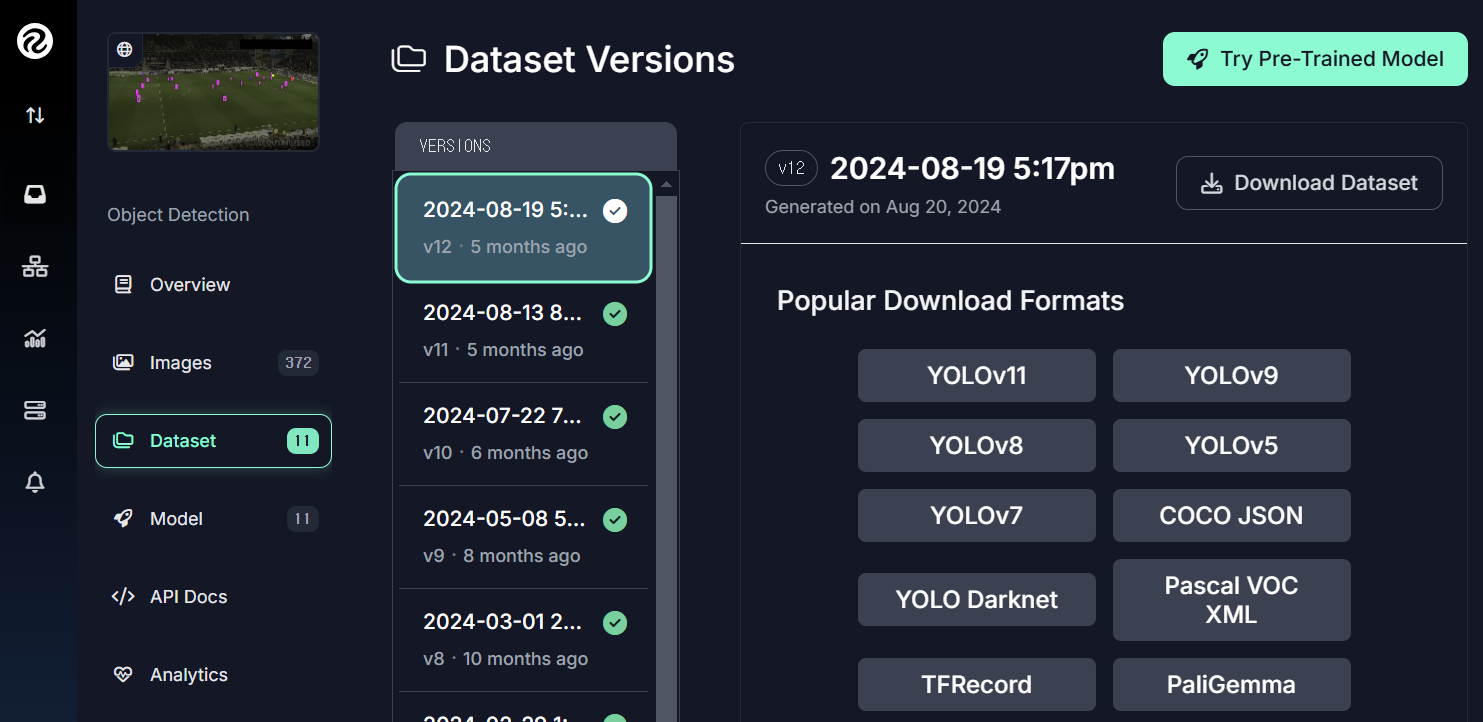

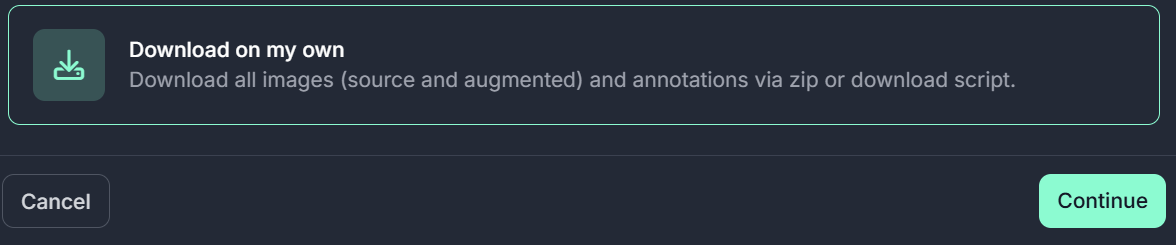

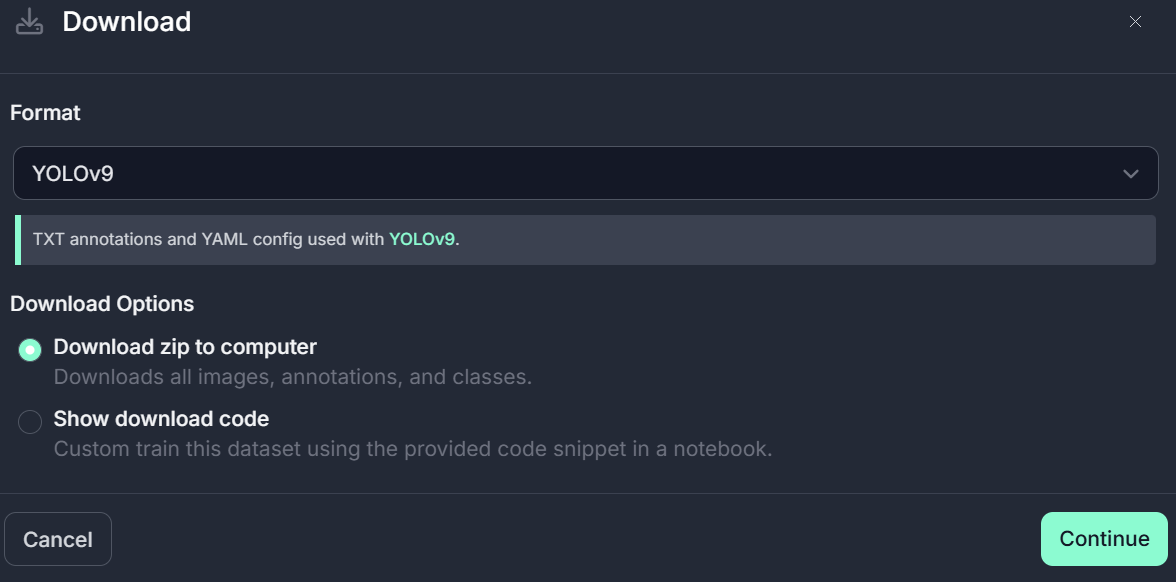

- 다운받은 데이터셋 zip 파일을 colab 내 yolov9 폴더 안에 업로드
- 압축풀고 train, valid, test 데이터셋 체크
- README.dataset.txt, README.roboflow.txt, data.yaml 체크

In [ ]:
!unzip -qq "football-players-detection.v12i.yolov9.zip"

In [7]:
!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data data.yaml \
--weights weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

train: weights=weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=data.yaml, hyp=hyp.scratch-high.yaml, epochs=25, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5 🚀 1e33dbb Python-3.9.0 torch-2.5.0 CUDA:0 (NVIDIA GeForce RTX 3090, 24257MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=7.5, cls=0.5, cls_pw=1.0, dfl=1.5, obj_pw=1.0, iou_t=0.2, anchor_t=5.0, fl_gamma=0.0, hsv_h=0.015, h

### 실험 결과 (loss)

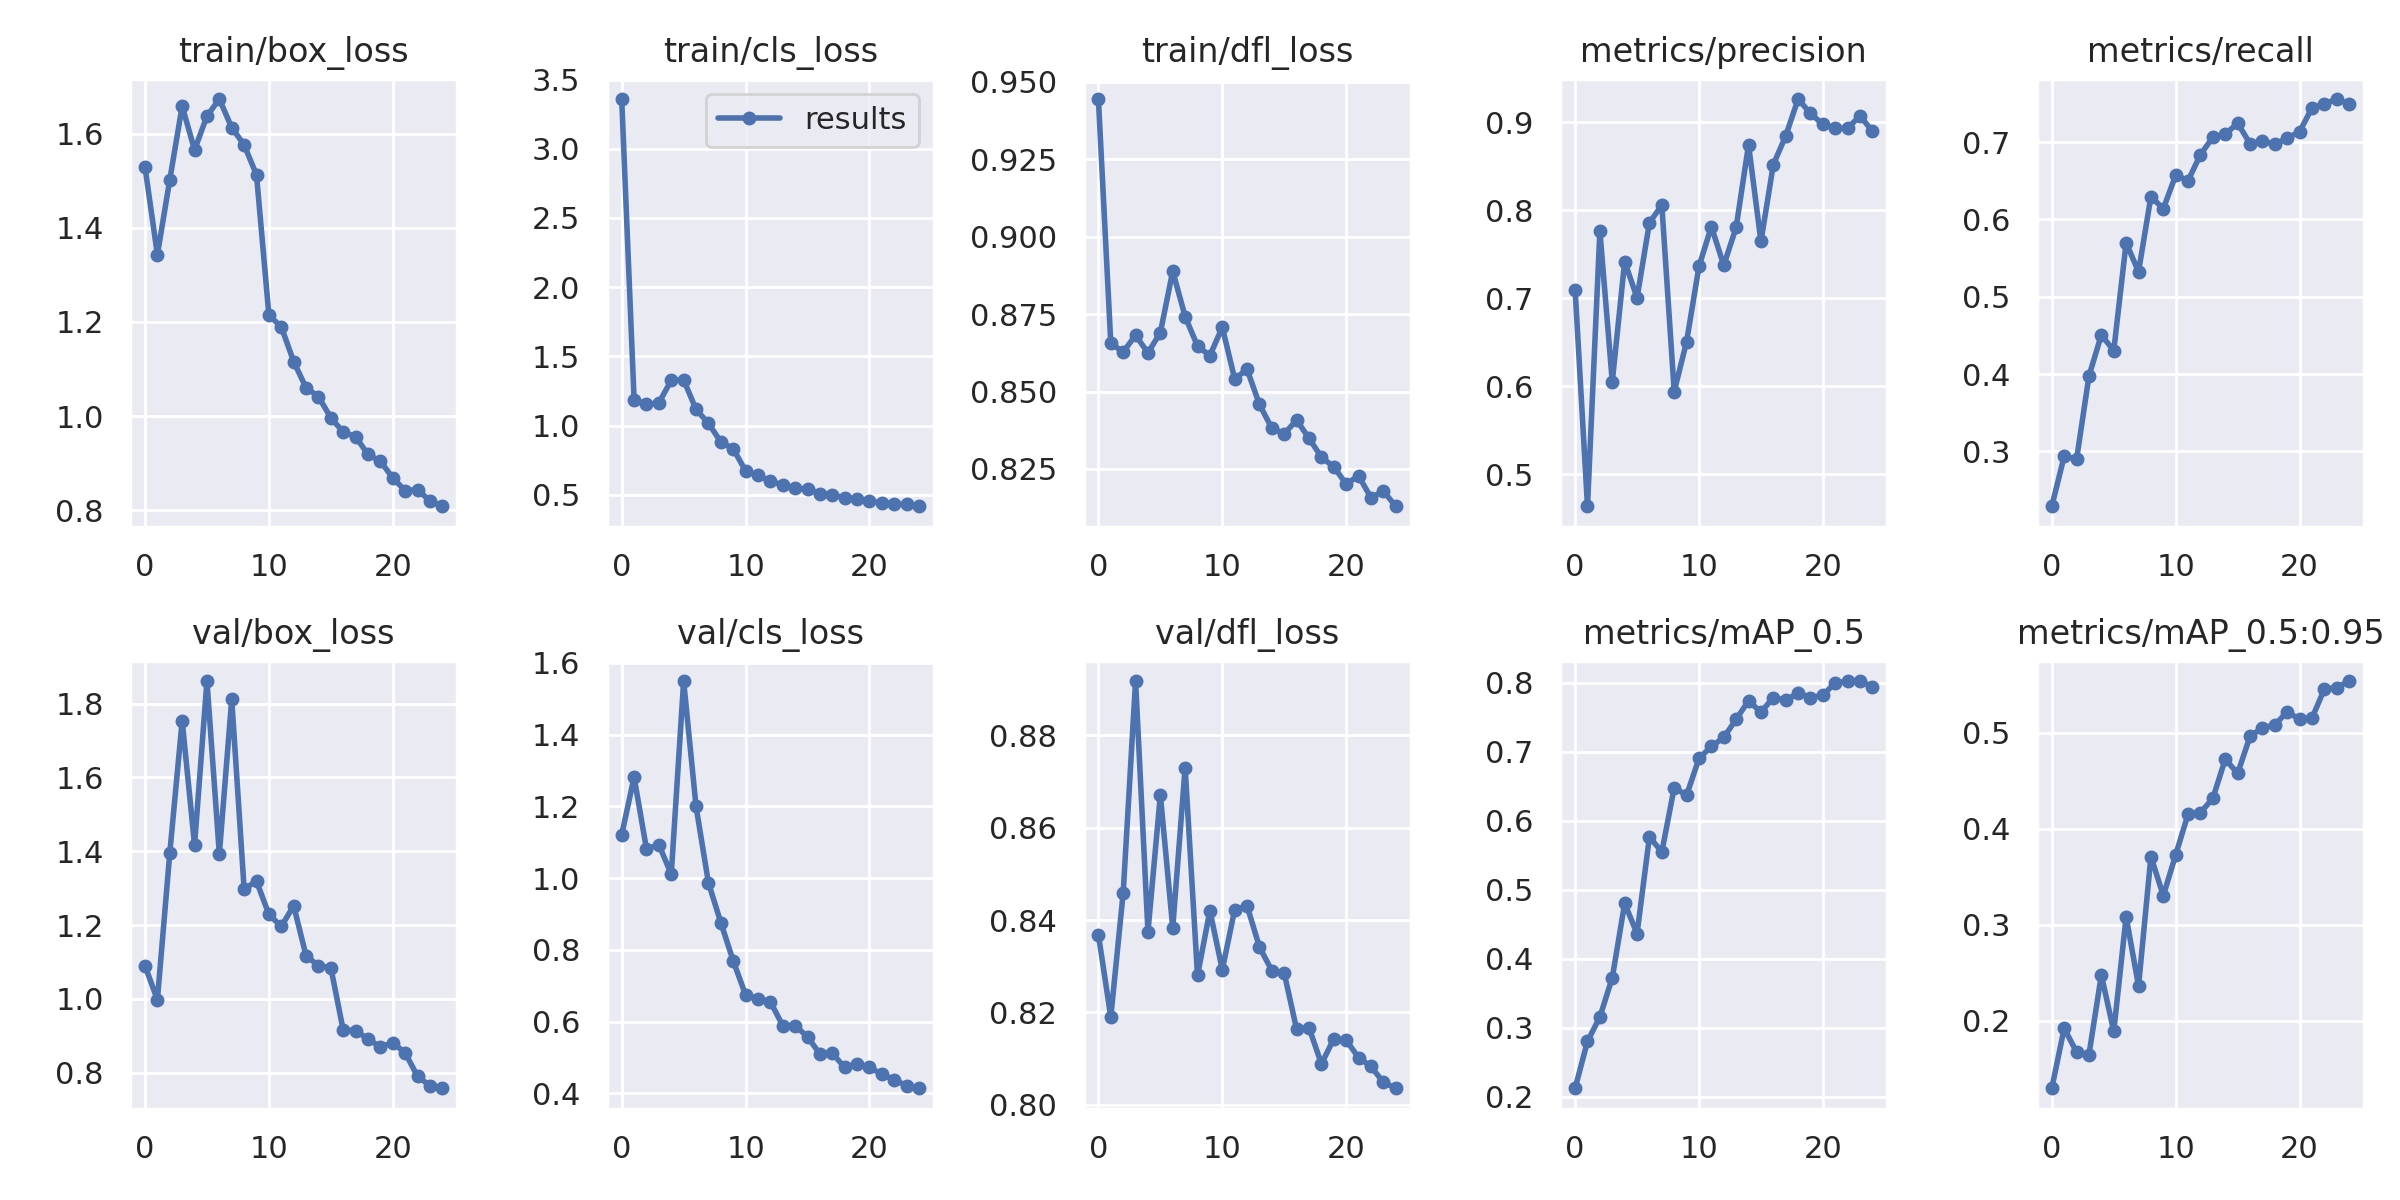

In [11]:
from IPython.display import Image

Image(filename=f"./runs/train/exp/results.png", width=1000)

### 커스텀 모델 validate 수행

- 가장 성능이 좋은 best.pt 모델을 활용해 수행

In [ ]:
!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data ./data.yaml \
--weights ./runs/train/exp/weights/best.pt

val: data=./data.yaml, weights=['./runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary o

### 학습된 모델 best.pt로 탐지하기

- test 폴더 내 images 로 테스트
- detect.py 를 실행하여 탐지 수행
- 잘 탐지되었는지 확인

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights ./runs/train/exp/weights/best.pt \
--source ./test/images

detect: weights=['./runs/train/exp/weights/best.pt'], source=./test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` w

- 추론 결과는 runs/detect/ 내부 디렉토리에 저장
- 결과 확인

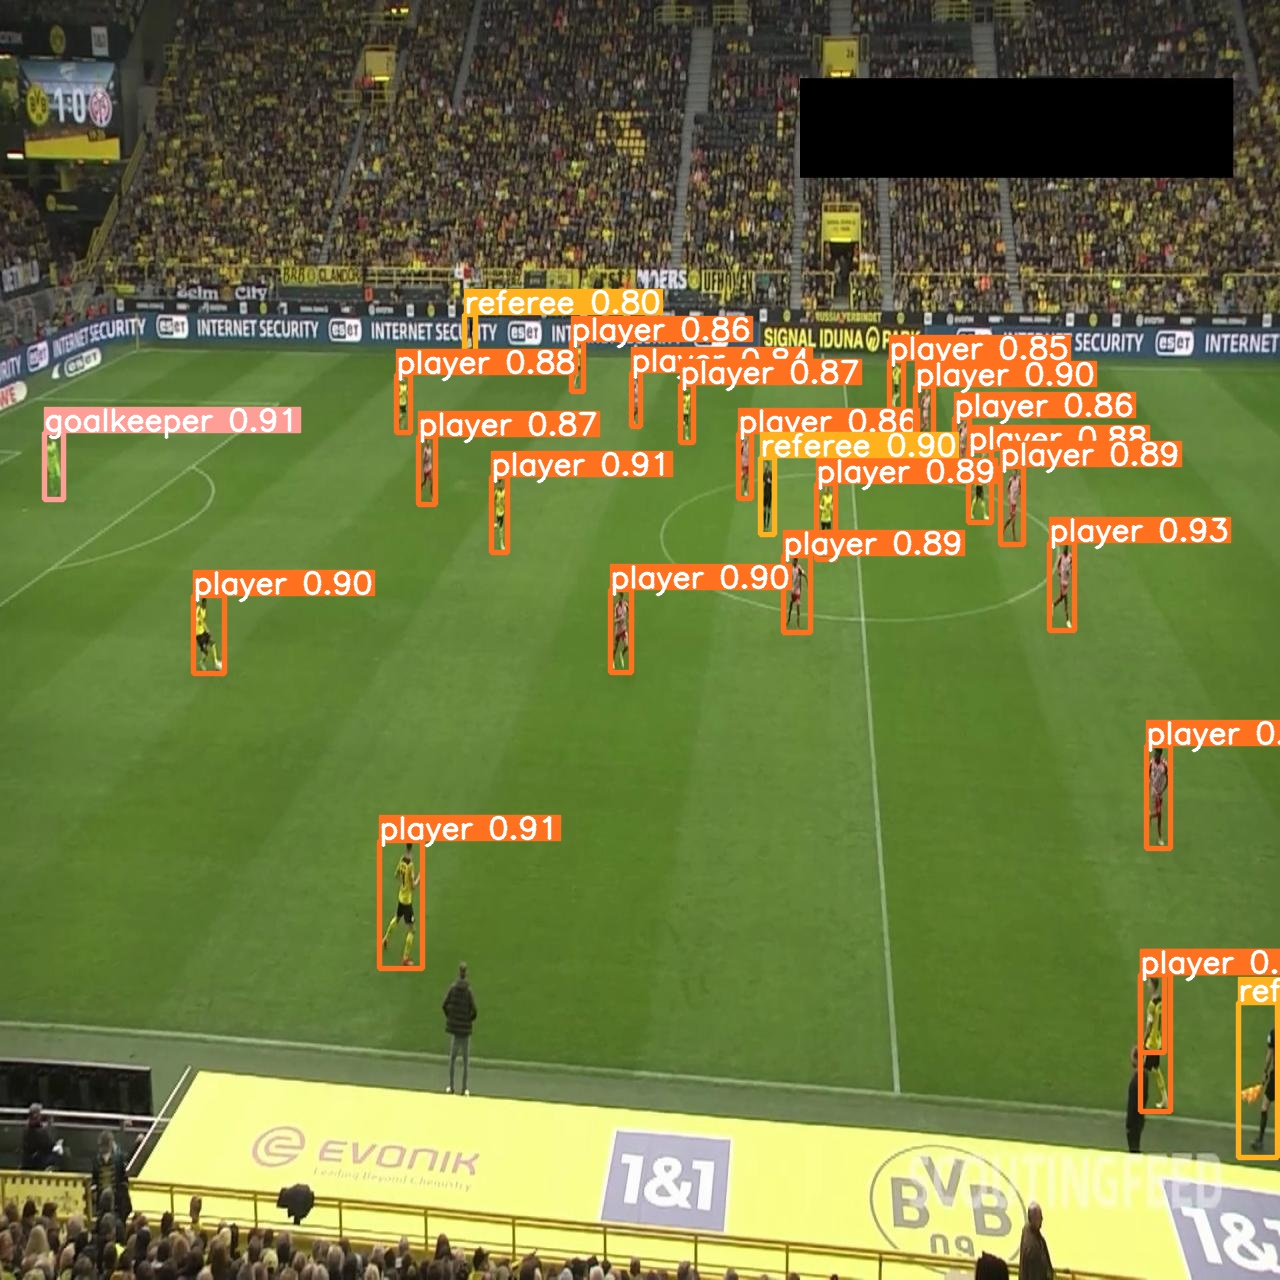

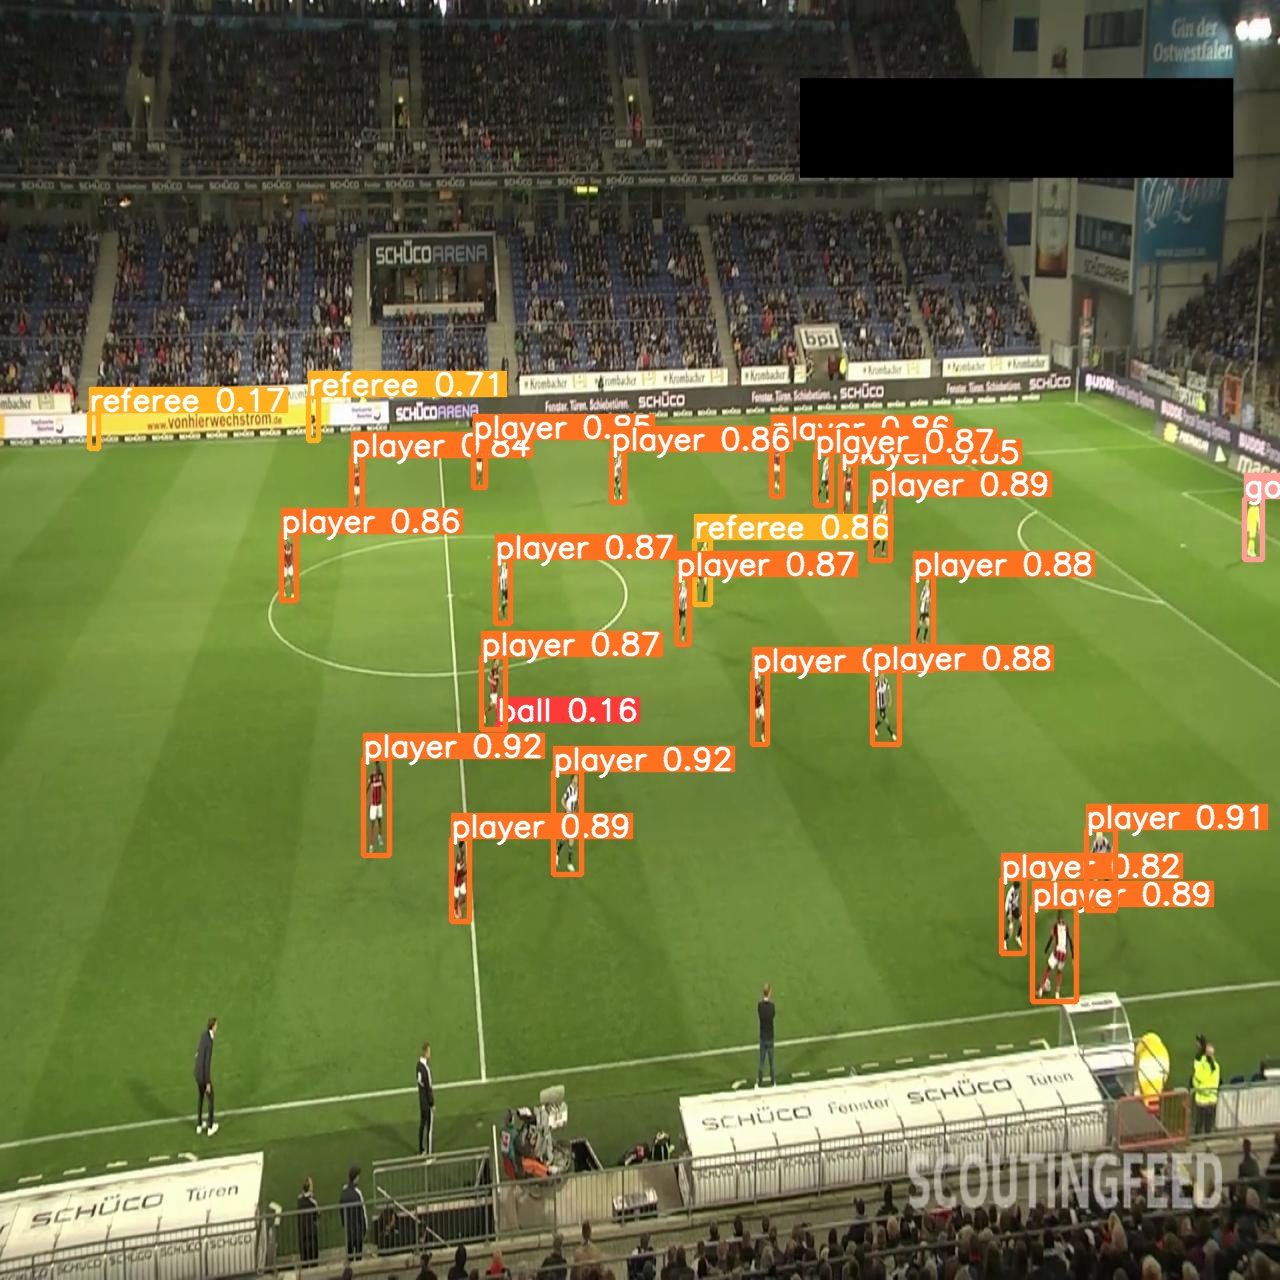

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'./runs/detect/exp2/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))